# FINAL PROJECT - loan Default Prediction

-->The dataset below is downloaded from Kaggle website and is established by a german professor Dr. Hans Hofmann. 

-->It is composed of 17 inputs that characterize 1000 bank customers having applied for a loan and a target which represents the credit risk ( bad or good ) .

-->Good risk means that the customer has fully paid back his loan in time whereas bad risk means that either the customer didn't at all pay it back or paid a proportion or paid it fully but not in time .

-->The categorical data in this dataset has been encoded as well as the attribute names that have been replaced by indices , which makes it not suitable for data visualization . We're going to replace the  categorical data by its original values and the column indices by the original headers. 

In [457]:
import pandas as pd
df_original=pd.read_csv('GermanData(3).csv',header=None)
df_original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,A11,6,A34,A43,1169,A65,A75,A93,A101,4,A121,67,A143,A152,2,A173,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,A92,A101,2,A121,22,A143,A152,1,A173,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,A93,A101,3,A121,49,A143,A152,1,A172,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,A93,A103,4,A122,45,A143,A153,1,A173,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,A93,A101,4,A124,53,A143,A153,2,A173,A191,A201,2


In [314]:
# transform the original dataset to a readable one with meaningful labels 
df_original.columns=['check_account','Duration','credit_hist','purpose','amount','sav_account','employ_since',
                     'status_sex','other_debtors','residence_since','property','Age','other_install','Housing','num_credits','Job'
                     ,'telephone','Foreign_worker','credit_risk']

In [315]:
df_original.head()

,check_account,Duration,credit_hist,purpose,amount,sav_account,employ_since,status_sex,other_debtors,residence_since,property,Age,other_install,Housing,num_credits,Job,telephone,Foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,A93,A101,4,A121,67,A143,A152,2,A173,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,A92,A101,2,A121,22,A143,A152,1,A173,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,A93,A101,3,A121,49,A143,A152,1,A172,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,A93,A103,4,A122,45,A143,A153,1,A173,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,A93,A101,4,A124,53,A143,A153,2,A173,A191,A201,2


In [316]:
# replacing the encoded values by their original values 
values_dict={'check_account':
             {'A11' :     '... <    0 DM',
             'A12' : '0 <= ... <  200 DM',
             'A13' :      '... >= 200 DM' ,    
               'A14' : 'no checking account'} , 
             'credit_hist':     
            {'A30' : 'no credits taken/ all credits paid back duly',
              'A31' : 'all credits at this bank paid back duly',
    'A32' :' existing credits paid back duly till now',
              'A33': 'delay in paying off in the past',
     'A34' : 'critical account'},
            'purpose':
                  { 'A40' : 'car(new)',
     'A41' : 'car(used)',
     'A42' : 'furniture/equipment',
             'A43' : 'radio/television',    
             'A44' : 'domestic appliances',
             'A45' : 'repairs',
             'A46' : 'education',
             'A47' : 'vacation',
             'A48': 'retraining',
            'A49' : 'business',
            'A410' : 'others' } ,
             'sav_account':
            {'A61' :  '... <  100 DM',
    'A62' :   '100 <= ... <  500 DM',
    'A63' :   '500 <= ... < 1000 DM',
    'A64' :          '.. >= 1000 DM',
              'A65' :   'no savings account'} ,
             'employ_since':
             {'A71' :'unemployed',
    'A72' :       '... < 1 year',
    'A73' : '1  <= ... < 4 years', 
    'A74' :'4  <= ... < 7 years',
    'A75' :       '.. >= 7 years'} , 
             'status_sex':
             {'A91' : 'male:divorced/separated',
              'A92' : 'female:divorced/separated/married',
              'A93' : 'male:single',
               'A94' : 'male:married/widowed',
              'A95' : 'female:single'} ,
             'other_debtors':
             {'A101':'none',
              'A102':'co-applicant',
              'A103':'guarantor'},
             'property':
             {'A121':'real estate',
             'A122':'life insurance',
              'A123': 'car or other',
             'A124' :'No property'} ,
             'other_install':
             {'A141' : 'bank',     
            'A142' : 'stores',
             'A143' : 'none'},
             'Housing':
                {'A151' : 'rent',
                'A152' : 'own',
                'A153' : 'for free'},
              'Job':{'A171' : 'unemployed- non-resident',
    'A172' : 'unemployed - resident',
   'A173' : 'skilled employee / official',
    'A174' : 'highly-qualified employee'} , 'telephone':{'A191' : 'no','A192' : 'yes'},
                  'Foreign_worker':{'A201' : 'yes','A202' : 'no'}}
             
df_transf=df_original.replace(to_replace=values_dict,regex=True)
df_final=df_transf.replace(to_replace={'credit_risk':{1:'Good',2:'Bad'}},regex=False) #credit_risk should be replaced 
                                                                                    # alone because it's numerical
df_final.head()

,check_account,Duration,credit_hist,purpose,amount,sav_account,employ_since,status_sex,other_debtors,residence_since,property,Age,other_install,Housing,num_credits,Job,telephone,Foreign_worker,credit_risk
0,... < 0 DM,6,critical account,radio/television,1169,no savings account,.. >= 7 years,male:single,none,4,real estate,67,none,own,2,skilled employee / official,yes,yes,Good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,no,yes,Bad
2,no checking account,12,critical account,education,2096,... < 100 DM,4 <= ... < 7 years,male:single,none,3,real estate,49,none,own,1,unemployed - resident,no,yes,Good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,male:single,guarantor,4,life insurance,45,none,for free,1,skilled employee / official,no,yes,Good
4,... < 0 DM,24,delay in paying off in the past,car(new),4870,... < 100 DM,1 <= ... < 4 years,male:single,none,4,No property,53,none,for free,2,skilled employee / official,no,yes,Bad


In [317]:
# Data cleaning 
df_final.isnull().sum()

check_account      0
Duration           0
credit_hist        0
purpose            0
amount             0
sav_account        0
employ_since       0
status_sex         0
other_debtors      0
residence_since    0
property           0
Age                0
other_install      0
Housing            0
num_credits        0
Job                0
telephone          0
Foreign_worker     0
credit_risk        0
dtype: int64

In [318]:
# The dataset has no missing values --> No cleaning

--> The dataset is now suitable for visualization

In [319]:
df_final.describe()

,Duration,amount,residence_since,Age,num_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.845000,35.546000,1.407000
std,12.058814,2822.736876,1.103718,11.375469,0.577654
min,4.000000,250.000000,1.000000,19.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000


In [320]:
# let's analyze the distribution of the features and the target 

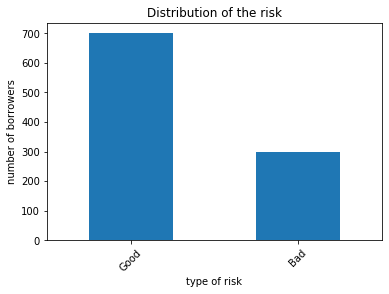

In [321]:
# visualize the distribution of the target 
import matplotlib.pyplot as plt
plt.title('Distribution of the risk')
plt.xlabel('type of risk')
plt.ylabel('number of borrowers')
vc=df_final['credit_risk'].value_counts()
vc.plot.bar(rot=45)


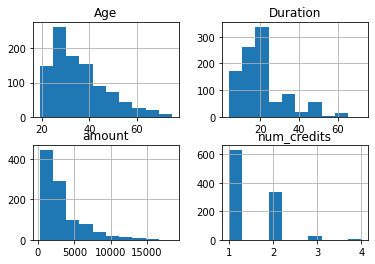

In [322]:
# Visualize the distribution of the features
# Step 1 : Separate visualization
# visualize the distribution of the numeric features 
numeric=df_final[['Duration','amount','Age','num_credits']]
ax=numeric.hist()

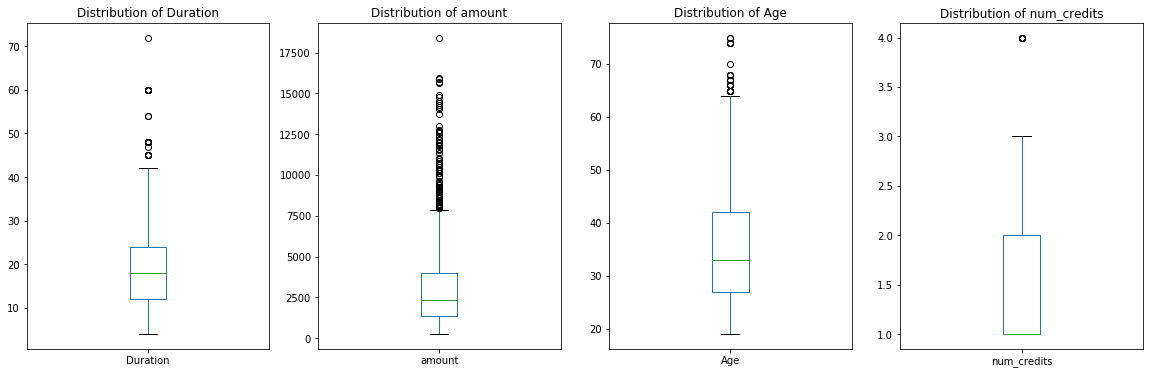

In [323]:
plt.figure(figsize = (20,6))
categorical=['Duration','amount','Age','num_credits']
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.title('Distribution of'+' '+categorical[i-1])
    df_final[categorical[i-1]].plot.box()
    

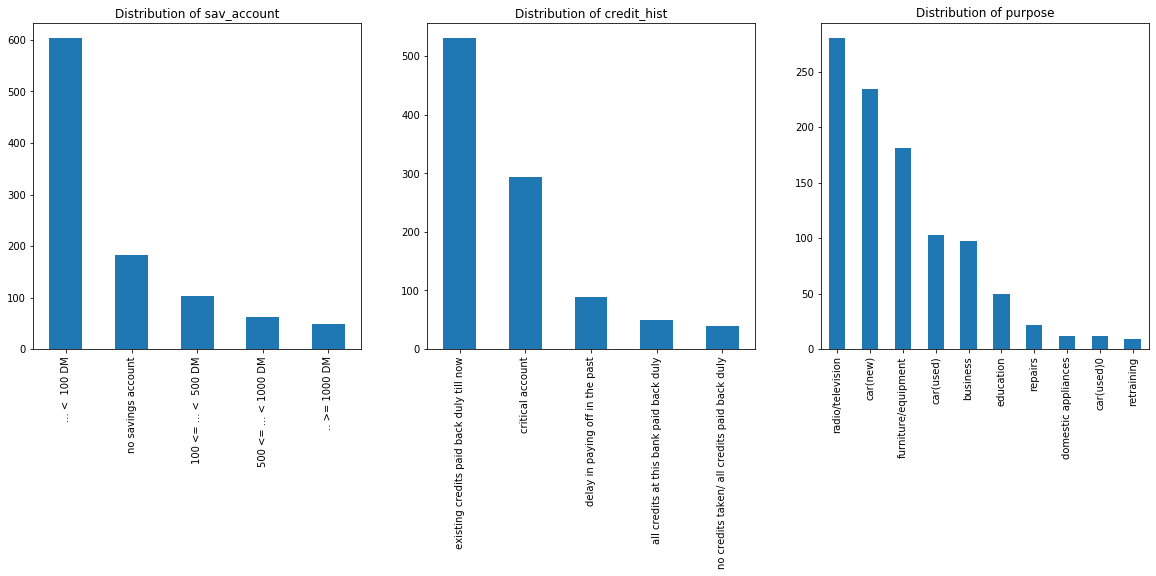

In [324]:
# visualize the distribution of the categorical features 
plt.figure(figsize = (20,6))
import matplotlib.pyplot as plt
categorical=['sav_account','credit_hist','purpose']
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.title('Distribution of'+' '+categorical[i-1])
    vc=df_final[categorical[i-1]].value_counts()
    vc.plot.bar()

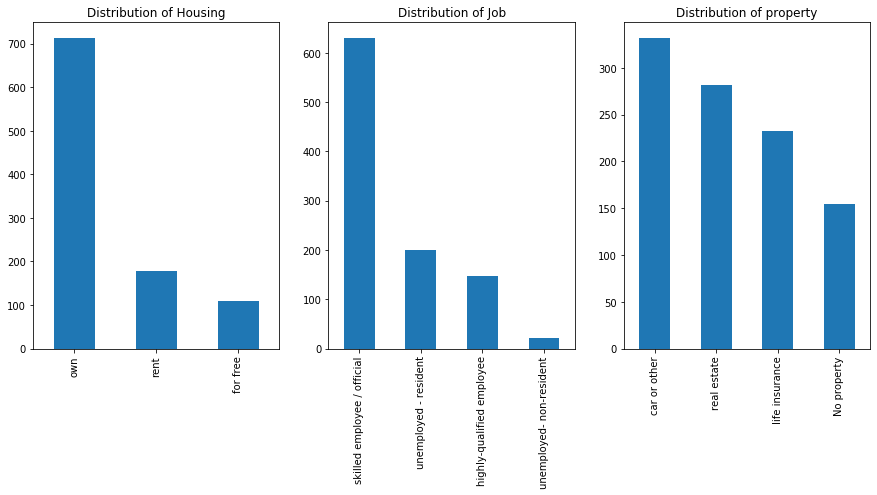

In [325]:
plt.figure(figsize = (15,6))
categorical=['Housing','Job','property']
for i in range(1,4):
    plt.subplot(1,3,i)
    plt.title('Distribution of'+' '+categorical[i-1])
    vc=df_final[categorical[i-1]].value_counts()
    vc.plot.bar()
    

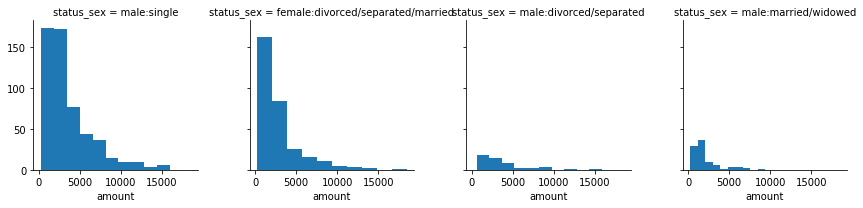

In [326]:
# Step 2 : correlated visualization
# visualize the distribution of credit amount by status_sex 
import seaborn as sns 
g=sns.FacetGrid(df_final,col='status_sex')
g.map(plt.hist,'amount')

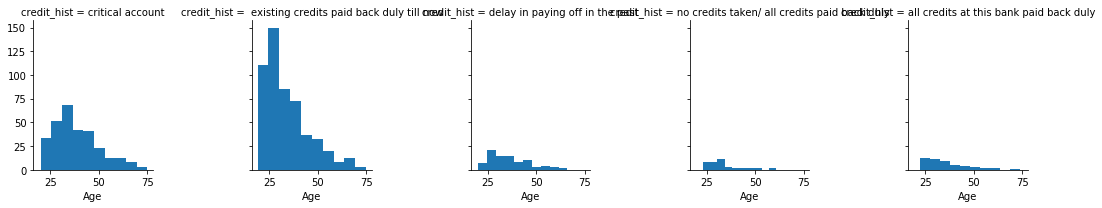

In [327]:
# visualize the distribution of credit history by age 
import seaborn as sns 
g=sns.FacetGrid(df_final,col='credit_hist')
g.map(plt.hist,'Age')


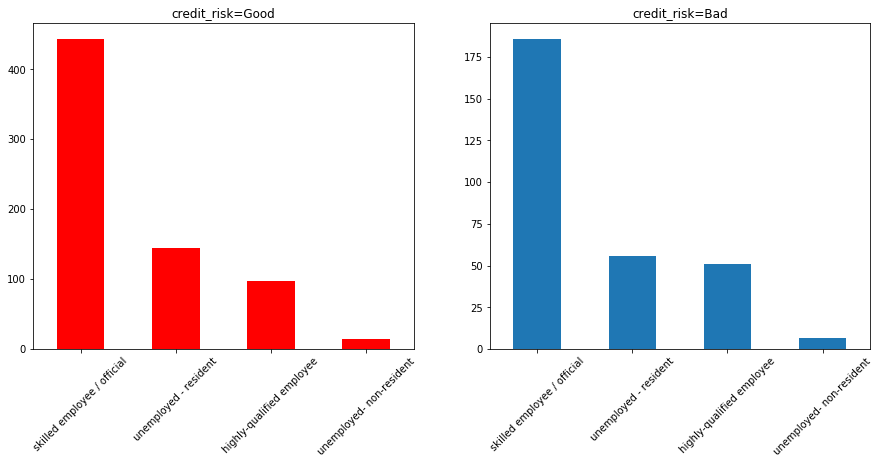

In [328]:
# Step 3 : visualize the impact of the features on the target 
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('credit_risk=Good')
vc1=df_final.loc[df_final['credit_risk']=='Good']['Job'].value_counts()
vc1.plot.bar(rot=45,color='red')
plt.subplot(1,2,2)
plt.title('credit_risk=Bad')
vc2=df_final.loc[df_final['credit_risk']=='Bad']['Job'].value_counts()
vc2.plot.bar(rot=45)

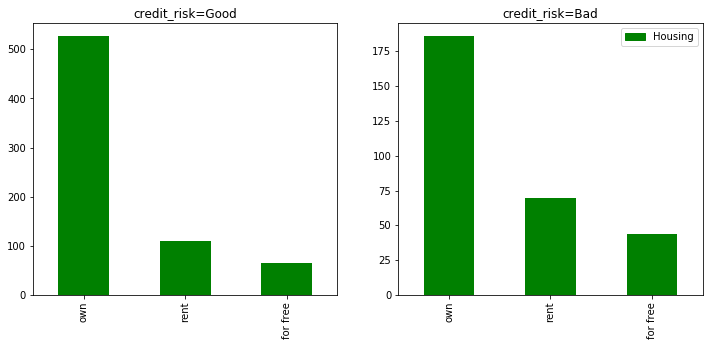

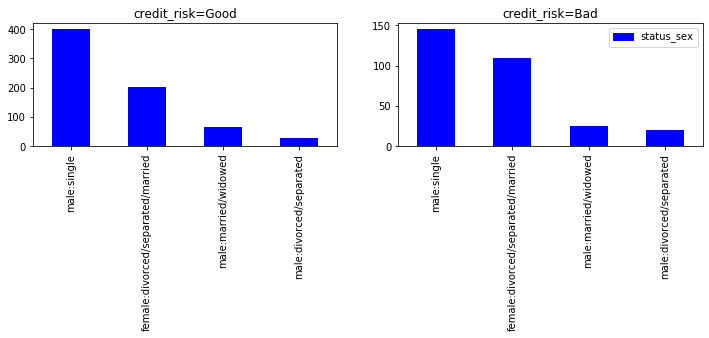

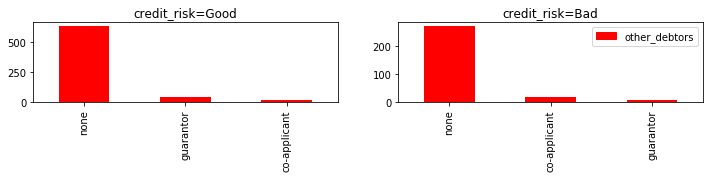

In [329]:
import matplotlib.patches as mpatches
features=['Housing','status_sex','other_debtors']
colours=['green','blue','red']
for i in range(1,4):
    plt.figure(figsize = (12,5))
    plt.subplot(i,2,1)
    plt.title('credit_risk=Good')
    vc1=df_final.loc[df_final['credit_risk']=='Good'][features[i-1]].value_counts()
    vc1.plot.bar(rot=90,color=colours[i-1])
    plt.subplot(i,2,2)
    plt.title('credit_risk=Bad')
    vc2=df_final.loc[df_final['credit_risk']=='Bad'][features[i-1]].value_counts()
    vc2.plot.bar(rot=90,color=colours[i-1])
    blue_patch = mpatches.Patch(color=colours[i-1], label=features[i-1])
    plt.legend(handles=[blue_patch])
    plt.show()
    

Now that we're done with the visualization , we're going to encode the categorical data in order to be able to apply the ML prediction model

In [330]:
# Data encoding 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical=['check_account','credit_hist','purpose','sav_account','employ_since',
              'status_sex','other_debtors','residence_since','property','other_install','Housing',
             'Job','telephone','Foreign_worker']
for cat in categorical:
    df_final[cat]=encoder.fit_transform(df_final[cat])
cleanup_nums={'credit_risk':{'Good':0 ,'Bad':1}}
df_final.replace(cleanup_nums,inplace=True)
df_final.head()

,check_account,Duration,credit_hist,purpose,amount,sav_account,employ_since,status_sex,other_debtors,residence_since,property,Age,other_install,Housing,num_credits,Job,telephone,Foreign_worker,credit_risk
0,0,6,2,7,1169,4,0,3,2,3,3,67,1,1,2,1,1,1,0
1,2,48,0,7,5951,1,2,0,2,1,3,22,1,1,1,1,0,1,1
2,3,12,2,5,2096,1,3,3,2,2,3,49,1,1,1,2,0,1,0
3,0,42,0,6,7882,1,3,3,1,3,2,45,1,0,1,1,0,1,0
4,0,24,3,1,4870,1,2,3,2,3,0,53,1,0,2,1,0,1,1


Now that all our data is numerical , we will select the most relevant features that we're going to use in the ML prediction model , using the correlation map.

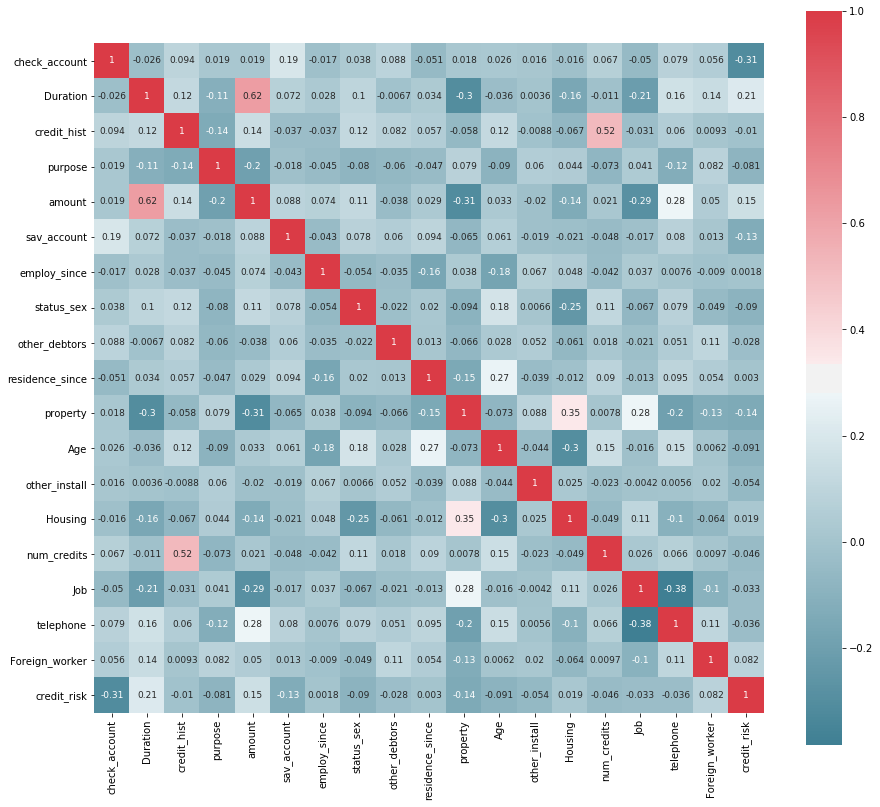

In [331]:
# Features selection
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15, 15 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 9 }

        )
plot_correlation_map(df_final)

In [332]:
# We're going to retain the features that have a correlation coefficient with the target > 0,1 . These features are : 
# check_account(0.31)
# Duration(0.21 in absolute)
# amount (0.15 in absolute)
# sav_account (0.13)
# property (0.14)

# ML model prediction 

The problem of this project is to classify a new applicant as a good risk or a bad risk . Since it's a classification
problem  , the classification models that we're going to use and compare are : 

-->Logistic regression 

-->KNN 

-->Random forest 

### Logistic regression

In [357]:
# Logistic regression evaluation structure : 
# Here's how we're going to proceed --> We're going to evaluate the performance of the model using three criteria : 
# The accuracy 
# The confusion Matrix ( from which we'll extract the precision and the recall ) 
# The total cost (since the False positives and the False negatives imply different costs in this problem )

In [427]:
# applying the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x=df_final[["Duration", "amount", "check_account", "sav_account","property"]]
y=df_final["credit_risk"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.72


In [428]:
# Confusion Matrix ( 1= Bad , 0 = Good)
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,223,29
1,68,30


In [429]:
# Precision and recall 
recall=30/(30+68)
print('recall is :',recall)
precision=30/(30+29)
print('precision is :',precision)

recall is : 0.30612244897959184
precision is : 0.5084745762711864


In [430]:
#Total cost 
# 1 FN costs 5 units , 1 FP costs 1 unit 
Total_cost=68*5+29*1
print('total_cost is :',Total_cost)

total_cost is : 369


In [431]:
# The logistic regression built-in model that we used from the scikit learn library takes a threshhold = 0.5 , by default . 
# However , the threshold = 0,5 isn't the optimal threshold . Since we want to reduce the total_cost and since we know
# that the FN imply a much higher cost than the FP , we would want to correctly predict the max of the bad applicants as
# bad . 
# For that , we're going to define a function that returns a dataframe composed of the recall , precision , total_cost and 
#accuracy for all the thresholds .

In [481]:
# We're going to construct a dataframe containing all the possible metrics for different thresholds to detremine the optimal one . 
def threshold_summary():
    lst1=[]
    lst2=[]
    lst3=[]
    lst4=[]
    lst5=[]
    index_lst=[]
    
    for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:  
        y_pred_new_threshold = (logreg.predict_proba(x_test)[:,1]>=i).astype(int)
        confusion_matrix=pd.crosstab(y_test,y_pred_new_threshold,rownames=['Actual'],colnames=['Predicted'])
        recall=round((confusion_matrix.iloc[1,1])/(confusion_matrix.iloc[1,1]+confusion_matrix.iloc[1,0]),2)
        precision=round((confusion_matrix.iloc[1,1])/(confusion_matrix.iloc[1,1]+confusion_matrix.iloc[0,1]),2)
        total_cost=confusion_matrix.iloc[0,1]*1+confusion_matrix.iloc[1,0]*5
        accuracy=round((confusion_matrix.iloc[0,0]+confusion_matrix.iloc[1,1])/confusion_matrix.sum().sum(),2)
        f1_score=round(2*(recall*precision)/(recall+precision),2)
        lst1.append(recall)
        lst2.append(precision)
        lst3.append(total_cost)
        lst4.append(accuracy)
        lst5.append(f1_score)
        index_lst.append('threshold'+' '+str(i))
        
        
    summary=pd.DataFrame({'recall':lst1,'precision':lst2,'total_cost':lst3,'accuracy':lst4,'f1_score':lst5},index=index_lst)
    return summary

In [482]:
threshold_summary()

,recall,precision,total_cost,accuracy,f1_score
threshold 0.1,0.97,0.30,239,0.35,0.46
threshold 0.2,0.85,0.38,213,0.56,0.53
threshold 0.3,0.70,0.45,230,0.67,0.55
threshold 0.4,0.54,0.49,281,0.71,0.51
threshold 0.5,0.31,0.51,369,0.72,0.39
threshold 0.6,0.15,0.56,427,0.73,0.24
threshold 0.7,0.07,0.64,459,0.73,0.13
threshold 0.8,0.04,1.00,470,0.73,0.08


In [483]:
# According to the table , the total_cost is minmized when the threshold is 0.2 --> Total cost is 213.
#In this case , 84% of the applicants representing a bad risk are correctly predicted as bad , 37 % of the applicants 
#that we predicted to be bad are actually bad and 56% of applicants are correctly predicted .

The min cost for the logistic regression is 213 with an accuracy = 56% for a threshold = 0.2

The best accuracy for the logistic regression is 73% with a total_cost of 427 for a threshold = 0.6

The best f1_score for the logistic regression is 55% with a total_cost of 230 and an accuracy of 67% for a threshold = 0.3

### KNN classifier

In [484]:
# We're going to construct a dataframe containing the total_cost and accuracy for each number of neighbors to determine
# the optimal one .
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

x=df_final[["Duration", "amount", "check_account", "sav_account","property"]]
y=df_final["credit_risk"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
lst_accuracy=[]
lst_cost=[]
lst_f1_score=[]
lst_index=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    lst_index.append('for'+' '+'n_neighbors'+' '+str(i))
    lst_accuracy.append(round(accuracy_score(y_pred,y_test),2))
    confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
    total_cost=confusion_matrix.iloc[0,1]*1+confusion_matrix.iloc[1,0]*5
    lst_f1_score.append(round(f1_score(y_test, y_pred),2))
    lst_cost.append(total_cost)
summary_knn=pd.DataFrame({'total_cost':lst_cost,'accuracy':lst_accuracy,'f1_score':lst_f1_score},index=lst_index)

In [485]:
summary_knn.sort_values(by='total_cost')

,total_cost,accuracy,f1_score
for n_neighbors 3,419,0.61,0.29
for n_neighbors 1,424,0.57,0.28
for n_neighbors 9,432,0.69,0.24
for n_neighbors 7,433,0.68,0.24
for n_neighbors 8,433,0.71,0.23
for n_neighbors 27,441,0.72,0.20
for n_neighbors 19,443,0.72,0.20
for n_neighbors 13,443,0.69,0.21
for n_neighbors 5,445,0.64,0.22
for n_neighbors 17,446,0.71,0.19


In [486]:
summary_knn.sort_values(by='accuracy',ascending=False)

,total_cost,accuracy,f1_score
for n_neighbors 30,451,0.73,0.16
for n_neighbors 18,448,0.73,0.17
for n_neighbors 29,451,0.73,0.16
for n_neighbors 28,451,0.73,0.16
for n_neighbors 27,441,0.72,0.20
for n_neighbors 26,463,0.72,0.12
for n_neighbors 19,443,0.72,0.20
for n_neighbors 16,453,0.72,0.16
for n_neighbors 20,470,0.71,0.11
for n_neighbors 14,458,0.71,0.15


In [487]:
summary_knn.sort_values(by='f1_score',ascending=False)

,total_cost,accuracy,f1_score
for n_neighbors 3,419,0.61,0.29
for n_neighbors 1,424,0.57,0.28
for n_neighbors 7,433,0.68,0.24
for n_neighbors 9,432,0.69,0.24
for n_neighbors 8,433,0.71,0.23
for n_neighbors 5,445,0.64,0.22
for n_neighbors 13,443,0.69,0.21
for n_neighbors 15,446,0.70,0.20
for n_neighbors 27,441,0.72,0.20
for n_neighbors 19,443,0.72,0.20


The min cost of KNN is 419 with an accuracy of 57 % for n_neighbors=3

The best accuracy of knn is 73% with a total_cost= 448 for n_neighbors =18

The best f1_score of KNN (29%) corresponds to the min cost ( 419 ) for n_neighbors=3 

### Random Forest

In [491]:
# We're going to construct a dataframe that contains the accuracy , total_cost and f1_score to determine the optimal number of trees . 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
x=df_final[["Duration", "amount", "check_account", "sav_account","property"]]
y=df_final["credit_risk"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.35,random_state=40)
 
lst_accuracy=[]
lst_cost=[]
lst_f1_score=[]
lst_index=[]
for i in range(1,20):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(x_train, y_train) 
    y_pred=clf.predict(x_test)
    lst_index.append('for'+' '+'n_estimators'+' '+str(i))
    lst_accuracy.append(round(accuracy_score(y_pred,y_test),2))
    confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
    total_cost=confusion_matrix.iloc[0,1]*1+confusion_matrix.iloc[1,0]*5
    lst_cost.append(total_cost)
    lst_f1_score.append(round(metrics.f1_score(y_test, y_pred),2))
summary_random_forest=pd.DataFrame({'total_cost':lst_cost,'accuracy':lst_accuracy,'f1_score':lst_f1_score},index=lst_index)

In [492]:
summary_random_forest.sort_values(by='total_cost')

,total_cost,accuracy,f1_score
for n_estimators 13,256,0.74,0.55
for n_estimators 7,283,0.73,0.52
for n_estimators 11,290,0.73,0.51
for n_estimators 17,291,0.73,0.51
for n_estimators 19,294,0.72,0.50
for n_estimators 9,294,0.72,0.50
for n_estimators 5,300,0.71,0.49
for n_estimators 14,304,0.73,0.49
for n_estimators 16,308,0.75,0.49
for n_estimators 15,309,0.72,0.48


The min total cost of the Random Forest model is 256 with an accuracy of 74% fo a number of trees = 13

The best accuracy of the Random forest model is 75% for a number of trees = 16 

The best f1_score of the Random Forest model is 55% for a number of trees = 13

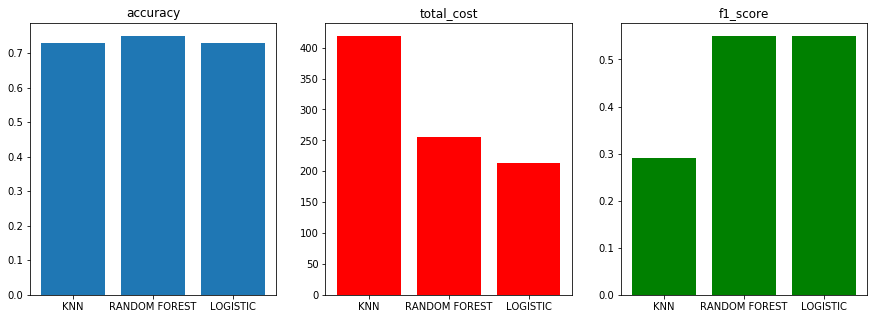

In [499]:
# Now , let's compare all three models in a plot : 
accuracies = [0.73,0.75,0.73]
total_costs = [419,256,213]
f1_scores=[0.29,0.55,0.55]
models=['KNN','RANDOM FOREST','LOGISTIC']
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title('accuracy')
plt.bar(models,accuracies)

plt.subplot(1,3,2)
plt.title('total_cost')
plt.bar(models,total_costs,color='red')


plt.subplot(1,3,3)
plt.title('f1_score')
plt.bar(models,f1_scores,color='green')
plt.show()

## Conclusion

If we take the accuracy as the evaluation criteria then the RANDOM FOREST ( for n_trees = 13) is the best model .


If we take the total_cost as the evaluation criteria the LOGISTIC REGRESSION ( for a threshold = 0.2 ) is the best model . 

If we take the f1_score as the evaluation criteria then LOGISTIC and RANDOM FOREST are the best and this case ,the choice would on whether we prioritize the total cost over the accuracy or not . 